In [1]:
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as mplt
import seaborn as sn
import datetime
import streamlit as st
import os
import plotly.express as px
import plotly.colors as pcolors
import plotly.graph_objects as go

In [ ]:
# --------------- lista de links e ideias --------------- #
# lista de tickers
# ver normalização dos precos das acoes , https://www.youtube.com/watch?v=FQp6kFER6v8
# https://mesmith027-streamlit-webapps-mc-pistreamlit-app-l4b15e.streamlit.app -> parece um infografico com bastante texto e gráficos legais

In [ ]:

os.chdir('C:/Users/Computadores Gamer/OneDrive/Área de Trabalho/python')
print(os.getcwd())

In [ ]:
# lista acoes
acoes = pd.read_csv('acoes-listadas.csv')['Código']
acoes.to_excel('acoes_listas.xlsx')

In [13]:
# gapminder
from gapminder import gapminder
gapminder.head()



,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
yf.pdr_override() #corrige problemas da bibliotece do pandas_datareader

In [ ]:
acoes = pd.read_excel(os.path.join('C:/Users/Computadores Gamer/OneDrive/Área de Trabalho/python/acoes_listas.xlsx'))['Código']
acoes

In [21]:
# definicao das datas e das acoes
# encontrar forma de deixar dinamico o numero de acoes e a peridiocidade do resample
# mudar o tipo de grafico de seaborn pq o streamlit nao aceita
data_i = '2020-01-01'
data_f = '2023-01-01'
ibov = ['^BOVSP']
acao_1 = ['ITUB3.SA']
acao_2 = ['CSNA3.SA']
acao_3 = ['VALE3.SA']
acao_4 = ['PETR3.SA']

acoes = [acao_1, acao_2,acao_3, acao_4]

tabela = pd.DataFrame()
for i in acoes:
    tabela_acao = round(yf.download(i, start=data_i, end=data_f)['Adj Close'].resample('M').last(),2)
    # tabela_acao['codigo'] = i
    tabela = pd.concat([tabela, tabela_acao], axis=1)
    print(tabela_acao.head(5))
    
    
# mplt.figure(figsize=(8,8))






[*********************100%***********************]  1 of 1 completed
Date
2020-01-31    25.15
2020-02-29    24.85
2020-03-31    19.19
2020-04-30    19.13
2020-05-31    19.09
Freq: M, Name: Adj Close, dtype: float64
[*********************100%***********************]  1 of 1 completed
Date
2020-01-31    9.62
2020-02-29    8.34
2020-03-31    5.21
2020-04-30    6.68
2020-05-31    7.71
Freq: M, Name: Adj Close, dtype: float64
[*********************100%***********************]  1 of 1 completed
Date
2020-01-31    35.20
2020-02-29    31.03
2020-03-31    30.26
2020-04-30    31.41
2020-05-31    37.11
Freq: M, Name: Adj Close, dtype: float64
[*********************100%***********************]  1 of 1 completed
Date
2020-01-31    11.61
2020-02-29    10.38
2020-03-31     5.41
2020-04-30     7.33
2020-05-31     8.19
Freq: M, Name: Adj Close, dtype: float64


In [12]:
grafico = px.line(tabela, title='Preço das ações')
grafico.update_layout(width=800, height=500)


2023-11-27 21:14:51.946 
  command:

    streamlit run C:\Users\Computadores Gamer\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [28]:
teste = pd.DataFrame({'a':[1,2,3],
                      'b':[4,5,6]})

teste.columns = ['x','y']


print(teste)





   x  y
0  1  4
1  2  5
2  3  6


In [47]:
lista_acoes = ['PETR3.SA','PETR4.SA','AMER3.SA', 'ARML3.SA', 'ARZZ3.SA','BALM4.SA']
data_i = '2020-11-01'
data_f = '2023-11-01'

tabela = pd.DataFrame()
for i in lista_acoes:
    tabela[f'{i}'] = round(yf.download(i, start=data_i, end=data_f)['Adj Close'].resample('M').last(),2)
# print(tabela)


tabela_retorn1 = tabela.pct_change().dropna()

media_retorno = tabela_retorn1.mean()
print(media_retorno)

matriz_cov = tabela_retorn1.cov()
print(matriz_cov)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
PETR3.SA    0.048089
PETR4.SA    0.048250
AMER3.SA   -0.099863
ARML3.SA   -0.007847
ARZZ3.SA   -0.008922
BALM4.SA   -0.020420
dtype: float64
          PETR3.SA  PETR4.SA  AMER3.SA  ARML3.SA  ARZZ3.SA  BALM4.SA
PETR3.SA  0.007957  0.007566  0.006062  0.004080  0.005401  0.000083
PETR4.SA  0.007566  0.007516  0.005638  0.003712  0.004970  0.000354
AMER3.SA  0.006062  0.005638  0.043116  0.007346  0.006718  0.004831
ARML3.SA  0.004080  0.003712  0.007346  0.025765  0.008674  0.008062
ARZZ3.SA  0.005401  0.004970  0.006718  0.008674  0.011573  0.001991
BALM4.SA  0.000083  0.000354  0

In [63]:
# tabelas pré-simulacao
numero_portfolios = 1000
tabela_retorn_esperados = np.zeros(numero_portfolios)
tabela_volatilidade_esperada = np.zeros(numero_portfolios)
tabela_sharpe = np.zeros(numero_portfolios)
tabela_pesos = np.zeros((numero_portfolios, len(lista_acoes))) # numero de linhas seria cada portfolio e o numero de colunas seria o peso de cada acoa em 'lista_acoes'


In [64]:
# simulacao
for i in range(numero_portfolios):
    pesos_aleatorios = np.random.random(len(lista_acoes)) # gera pesos aleatorio
    pesos_aleatorios = pesos_aleatorios/np.sum(pesos_aleatorios) # descobre a porcentagem de cada peso sobre o total de pesos daquela linha
    tabela_pesos[i,:] = pesos_aleatorios # completa uma linha e pula pra próxima até o numero total de portfolios
    tabela_retorn_esperados[i] = np.sum(media_retorno * pesos_aleatorios * 252) 
    tabela_volatilidade_esperada[i] = np.sqrt(np.dot(pesos_aleatorios.T, np.dot(matriz_cov * 252, pesos_aleatorios))) # np.dot é o produto entre duas matrizes, linha x coluna
    tabela_sharpe[i] = tabela_retorn_esperados[i] / tabela_volatilidade_esperada[i]




In [65]:
# achando a melhor carteira, analisando o indice de sharpe
indice_sharp_max = tabela_sharpe.argmax() # retorna o indice da linha onde esta o indice de sharpe maximo
tabela_pesos[indice_sharp_max] # com isso pego a carteira (um dos portfolios) que apresenta a melhor relação entre retorno e risco que seria o indice de sharpe

array([0.40636624, 0.3469428 , 0.00128885, 0.08760669, 0.12900641,
       0.02878901])

In [ ]:
fronteira_eficiente = np.linspace(tabela_retorn_esperados.min())


1.2984402460736135

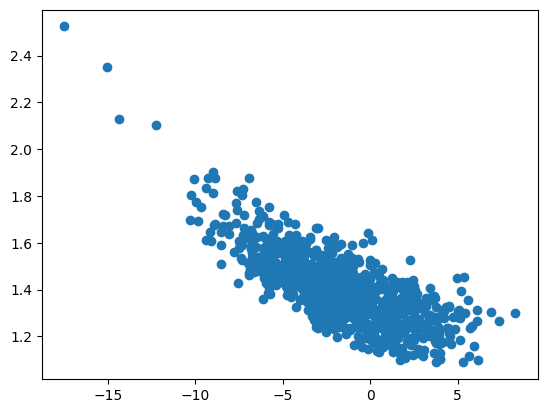

In [55]:
mplt.scatter(tabela_retorn_esperados, tabela_volatilidade_esperada )